# Class 05 Add 

## Neural Network Training
### • Training ?  
>Automatically obtaining optimal values of weight parameters from training data.  
>An indicator that allows the neural network to train: **a loss function**
### • Loss Function ?  
>An indicator of **'poor'** performance of a neural network  
>>• In neural network learning, the current state is expressed as 'one indicator'.  
>>• You need to explore the value of the weighting parameter that makes the indicator best.  
>>• The index used in neural network training is called a loss function. 
<img src = './images/mse_cee.png' width=600 height=300>  

### • Why use a loss function as an indicator ?  
>• Ultimate Goal -> Maximize Accuracy  
>• Why not use accuracy as an indicator ?  
>>• Learning (training) of neural networks is …
>>>A method of updating parameters by differentiating indicators with weight parameters is used.  
>>>• If accuracy is used as an indicator...
>>>>The derivative of the parameter becomes zero in most places, so the parameter cannot be updated.  
### • How to evaluate the performance of the model :
>• the regression model is evaluated by MSE, etc., 
>• but the classification model is evaluated by accuracy, precision, reproducibility, f1 score, etc.  
>• Before introducing classification model performance evaluation indicators, it is necessary to understand the number of cases of correct or incorrect answers.
>>• True Positive(TP): Predicts Positive that is actually Positive (True)  
>>• True Negative(TN): Predicts Negative that is actually Negative (True)  
>>• False Positive(FP): Predict Positive that is actually Negative (False) – Type I error  
>>• False Negative(FN): Predict Negative that is actually Positive (False) – Type II error  

> Let us define an experiment from P positive instances and N negative instances for some condition. The four outcomes can be formulated in a 2×2 contingency table or **confusion matrix**, as follows:
><img src='./images/confusion.png' width=600 height=400>
>A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.
><img src='images/confusion_ex.png' width=600 height=400>

* **Accuracy(정확도)**: Overall, how often is the classifier correct?  
><img src='./images/accuracy.png' width=500 height=300>  
>(TP+TN)/total = (100+50)/165 = 0.91

* **Misclassification Rate(오분류율)**: Overall, how often is it wrong?  
>(FP+FN)/total = (10+5)/165 = 0.09  equivalent to 1 minus Accuracy  also known as "**Error Rate**"  


* **True Positive Rate**: When it's actually yes, how often does it predict yes?  
>TP/actual yes = 100/105 = 0.95  also known as **"Sensitivity" or "Recall"**  
><img src='./images/sens.png' width=500 height=300>  


* **False Positive Rate**: When it's actually no, how often does it predict yes?  
>FP/actual no = 10/60 = 0.17  

* **True Negative Rate**: When it's actually no, how often does it predict no?  
>TN/actual no = 50/60 = 0.83  equivalent to 1 minus False Positive Rate  also known as **"Specificity"**   
><img src='./images/spec.png' width=500 height=300>  

* **Precision(정밀도)**: When it predicts yes, how often is it correct?    
><img src='./images/precision.png' width=500 height=300>  
>TP/predicted yes = 100/110 = 0.91  

* **Prevalence**: How often does the yes condition actually occur in our sample?  
>actual yes/total = 105/165 = 0.64  


* **F1 score**
>* F1 score is a machine learning evaluation metric that measures a model’s accuracy. 
>* It combines the precision and recall scores of a model.
>* The F1 score combines precision and recall using their harmonic mean, and maximizing the F1 score implies simultaneously maximizing both precision and recall. 
>* Thus, the F1 score has become the choice of researchers for evaluating their models in conjunction with accuracy.
><img src='./images/f1score.png' width=400 height=150>




## Gradient Descent

[[Gradient Descent Optimization Algorithms]](https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3)

### SGD, Momentum, AdaGrad, Adam

In [68]:
import numpy as np

class SGD:

    """확률적 경사 하강법（Stochastic Gradient Descent）"""

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 


class Momentum:

    """Momentum SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]

class Nesterov:

    """Nesterov's Accelerated Gradient (http://arxiv.org/abs/1212.0901)"""
    # NAG is a step forward from momentum. (http://newsight.tistory.com/224)
    
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.v[key] *= self.momentum
            self.v[key] -= self.lr * grads[key]
            params[key] += self.momentum * self.momentum * self.v[key]
            params[key] -= (1 + self.momentum) * self.lr * grads[key]


class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

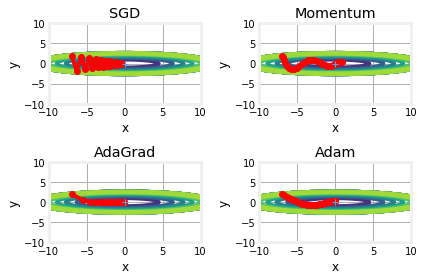

In [72]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
# from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

===========iteration:0===========
SGD:2.3742037448849533
Momentum:2.3589907852765943
AdaGrad:1.8745360822487285
Adam:2.2080627658214738
===========iteration:100===========
SGD:1.3828028416035743
Momentum:0.31705469917131013
AdaGrad:0.10960668604417415
Adam:0.22692827071696753
===========iteration:200===========
SGD:0.6813879297640192
Momentum:0.23929540405616437
AdaGrad:0.12523140929905638
Adam:0.18444075068978186
===========iteration:300===========
SGD:0.5268362113762377
Momentum:0.21519400539344058
AdaGrad:0.11733034134778914
Adam:0.20698809214682815
===========iteration:400===========
SGD:0.419970009211661
Momentum:0.16201141110230782
AdaGrad:0.07080686828289143
Adam:0.11688253261965381
===========iteration:500===========
SGD:0.38403369460441683
Momentum:0.14251544938190983
AdaGrad:0.0671111658387409
Adam:0.1383300072331799
===========iteration:600===========
SGD:0.38863451727611753
Momentum:0.17233497225345218
AdaGrad:0.0696960738430572
Adam:0.12415512614483501
===========iteration

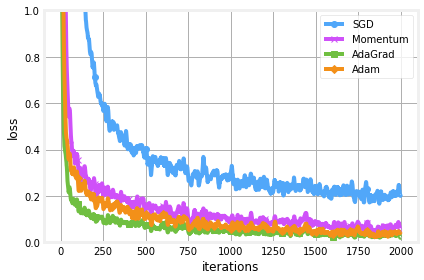

In [67]:
import os
import sys
sys.path.append(os.pardir)  
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# Load MNIST data  =========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


#  optimizers ==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# Training  ==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# Plot  =========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

## MNIST

In [ ]:
## Assignment 4 

### Predicting Survival Rates for Lung Cancer Surgery Patients
> 1. Write a program to predict the life or death of a new patient using data from existing patients!  
>> * Actual medical record data ('data/lungcancer.csv') recording preoperative diagnosis data and postoperative survival results of lung cancer surgery patients published in 2013 by Medical University in Poland.
>> * The medical treatment file is in the table format, and the treatment information of a total of 470 patients is recorded.
>> <img src = './images/asg4.png' width=600 height=200>
>> * Each patient can be divided into rows, and the columns from A to Q are the degree of disease of each patient,
>> * The last R column is the final survival status of the patient. 1 is survival, 0 is death.
>2. Complete the following code
>3. Add a description to each line of code
>4. Save as a pdf file and upload on LMS and submit a hardcopy before the next class(1000am, 4/11/2023)

In [ ]:
# Predicting Survival Rates for Lung Cancer Surgery Patients
# 
from keras.models import Sequential
from keras.layers import Dense

# 
import numpy
import tensorflow as tf

# 
seed = 
numpy.random.seed(seed)
tf.random.set_seed(seed) 

# 
Data_set = __________("_____lungcancer.csv", delimiter=_____)

# 
X = Data_set[______________]
Y = Data_set[______________]

# 
model = Sequential()
model.add(Dense(30, input_dim=___, activation=________))
model.add(Dense(1, activation=___________))

# 
model.compile(loss=____________, optimizer=_______, metrics=['accuracy'])
model.fit(X, Y, epochs=_____, batch_size=______)

# 
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

